In [1]:
import signac
import matplotlib.pyplot as plt
import numpy as np

project = signac.get_project()

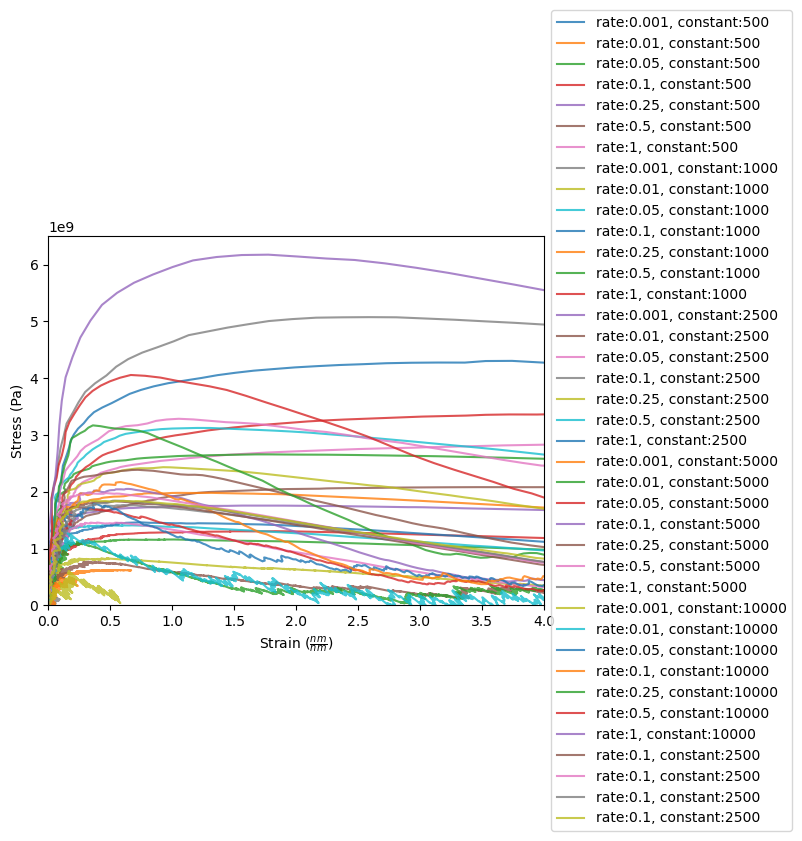

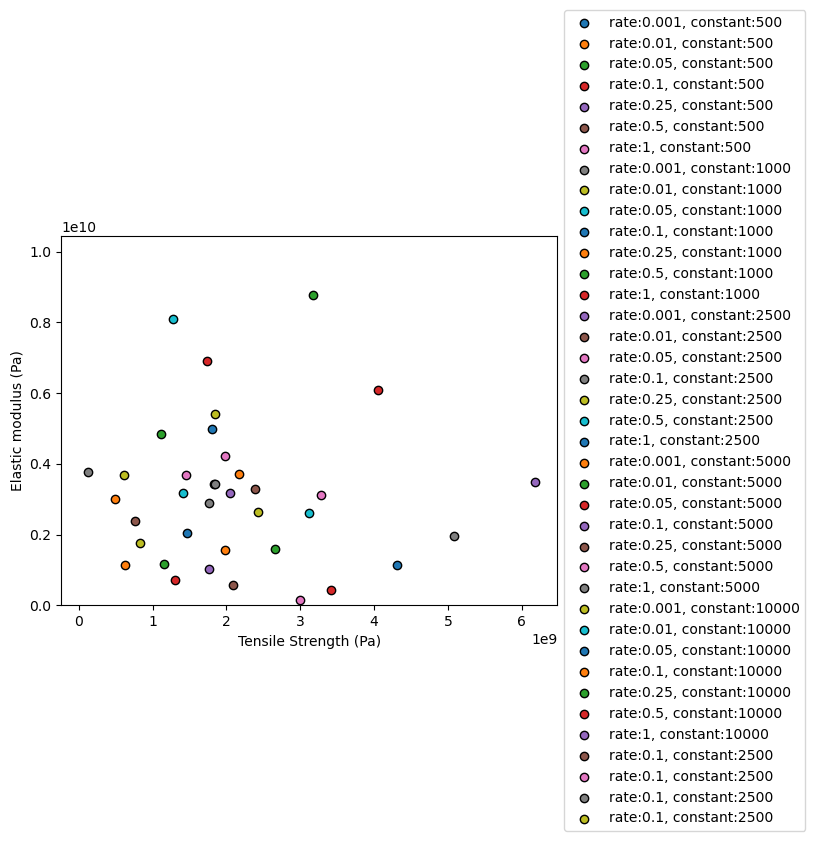

In [3]:
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
            # if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0):
                continue
            stress = np.array(job.doc.get('stress'))
            plt.plot(np.array(job.doc['strain']), np.array(stress), label=f'rate:{job.sp.pull_rate}, constant:{job.sp.pull_constant}', alpha=.8)
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Strain $(\\frac{nm}{nm})$')
plt.ylabel('Stress (Pa)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0)
plt.xlim(0,4)
plt.show()
plt.close()

# Ashby plot
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            plt.scatter(np.array(job.doc['ultimate_tensile_strength']), np.array(job.doc['elastic_modulus']), label=f'rate:{job.sp.pull_rate}, constant:{job.sp.pull_constant}', edgecolors='k')
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Tensile Strength (Pa)')
plt.ylabel('Elastic modulus (Pa)')
plt.ylim(0)
# plt.yscale('log')
# plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
sub = project.find_jobs({
    "sp.pull_constant": {"$in": [2500]},
    "sp.pull_rate": {"$in": [.1]},
    "sp.pull_steps": {"$in": [250000]}
})
sub

,sp.pdbID,sp.n_repeats,sp.fiberverse_directory,sp.type,sp.pull_chains,sp.pull_constant,sp.pull_rate,sp.pull_steps,doc.protofibrils,doc.cross_sectional_area,doc.strain,doc.stress,doc.elastic_modulus,doc.ultimate_tensile_strength,doc.min_coords,doc.max_coords,doc.growth_axis,doc.pulling_length,doc.box_size,doc.pull_chains
7e17ff67ab226c11b57ae19f1c64bba7,6Y1A,1,/data/yang_lab/nehilpkd/fibrilverse_rcsb,single,"[0, 1]",2500,0.1,250000,"[{'A': [86.13687896728516, 103.17935943603516,...",2.079896e-18,"[0.0, -0.0068794848446560785, -0.0096308430963...","[17.62102230505231, 15816268.910732683, 293536...",2.888541e+09,1.766112e+09,NaN,NaN,NaN,NaN,NaN,NaN
22d321a5fd0a851c182e9383d7930446,6Y1A,5,/data/yang_lab/nehilpkd/fibrilverse_rcsb,single,"[0, 1]",2500,0.1,250000,"[{'A': [86.13687896728516, 103.17935943603516,...",2.079896e-18,"[0.0, -0.0068794848446560785, -0.0096286646654...","[17.62102230505231, 15816124.672775922, 293535...",5.395735e+09,1.842900e+09,"[0.01, -0.054, -0.002]","[3.534, 3.941, 4.29]",2.0,21.46,"[7.048, 7.989999999999999, 21.46]","[0, 1]"
d73148d98882664d81b12c2f3017cc13,6Y1A,4,/data/yang_lab/nehilpkd/fibrilverse_rcsb,single,"[0, 1]",2500,0.1,250000,"[{'A': [86.13687896728516, 103.17935943603516,...",2.079896e-18,"[0.0, -0.0068794848446560785, -0.0096308430963...","[17.62102230505231, 15816316.990051603, 293539...",3.440489e+09,1.843827e+09,"[0.01, -0.054, -0.002]","[3.534, 3.941, 4.29]",2.0,21.46,"[7.048, 7.989999999999999, 21.46]","[0, 1]"
dd183d3ad408a9560f999a522d1e5e0f,6Y1A,3,/data/yang_lab/nehilpkd/fibrilverse_rcsb,single,"[0, 1]",2500,0.1,250000,"[{'A': [86.13687896728516, 103.17935943603516,...",2.079896e-18,"[0.0, -0.0068794848446560785, -0.0096308430963...","[17.62102230505231, 15816124.672775922, 293537...",4.215724e+09,1.976940e+09,"[0.01, -0.054, -0.002]","[3.534, 3.941, 4.29]",2.0,21.46,"[7.048, 7.989999999999999, 21.46]","[0, 1]"
8def80476531ad9e9b8962076ea10397,6Y1A,2,/data/yang_lab/nehilpkd/fibrilverse_rcsb,single,"[0, 1]",2500,0.1,250000,"[{'A': [86.13687896728516, 103.17935943603516,...",2.079896e-18,"[0.0, -0.0068794848446560785, -0.0096308430963...","[17.62102230505231, 15816076.593457002, 293539...",3.428387e+09,1.832577e+09,"[0.01, -0.054, -0.002]","[3.534, 3.941, 4.29]",2.0,21.46,"[7.048, 7.989999999999999, 21.46]","[0, 1]"


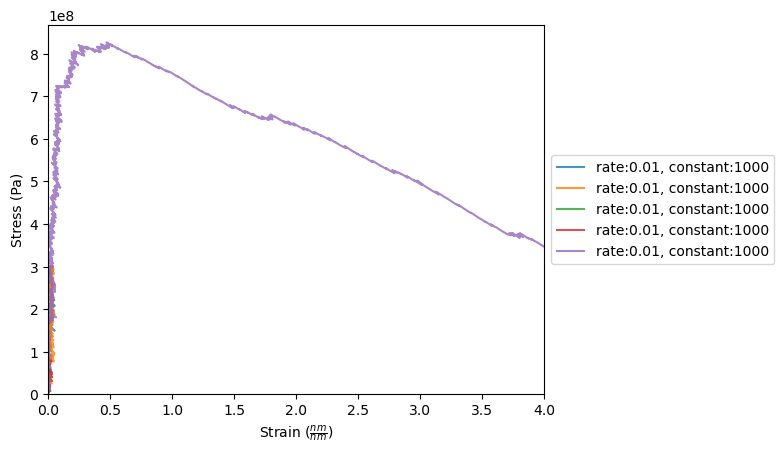

In [5]:
sub = project.find_jobs({
    "sp.pull_constant": {"$in": [1000]},
    "sp.pull_rate": {"$in": [.01]},
    "sp.pull_steps": {"$in": [250000]}
})
for job in sub:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
            # if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0):
                continue
            stress = np.array(job.doc.get('stress'))
            plt.plot(np.array(job.doc['strain']), np.array(stress), label=f'rate:{job.sp.pull_rate}, constant:{job.sp.pull_constant}', alpha=.8)
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Strain $(\\frac{nm}{nm})$')
plt.ylabel('Stress (Pa)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0)
plt.xlim(0,4)
plt.show()
plt.close()

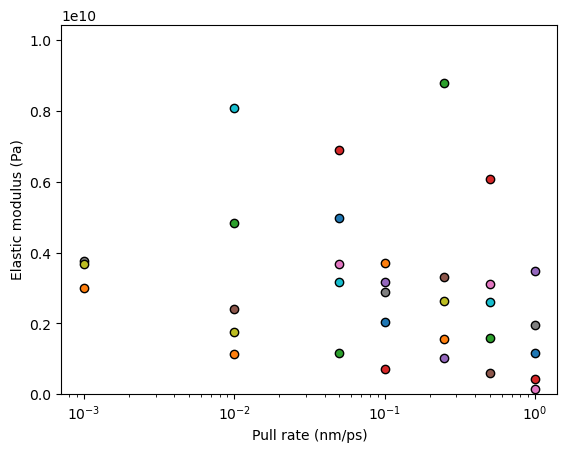

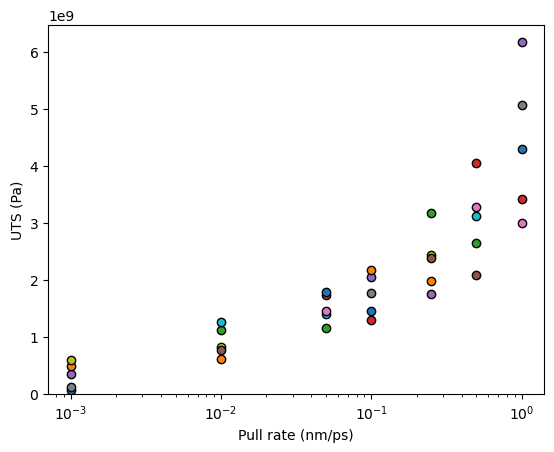

In [ ]:
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            plt.scatter(job.sp.pull_rate, np.array(job.doc['elastic_modulus']), edgecolors='k')
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Pull rate (nm/ps)')
plt.ylabel('Elastic modulus (Pa)')
plt.xscale('log')
plt.ylim(0)
plt.show()

for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            plt.scatter(job.sp.pull_rate, np.array(job.doc['ultimate_tensile_strength']), edgecolors='k')
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Pull rate (nm/ps)')
plt.ylabel('UTS (Pa)')
plt.xscale('log')
plt.ylim(0)
plt.show()

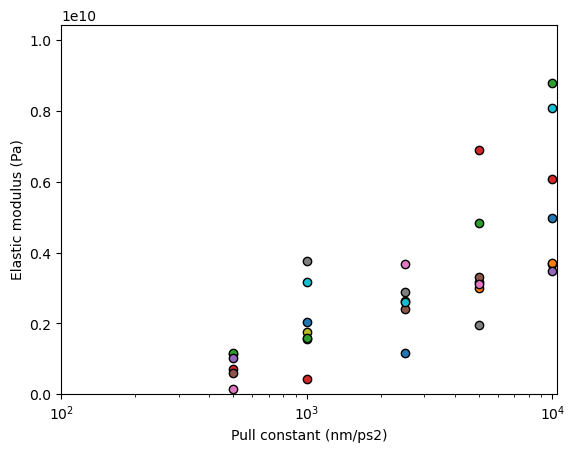

(0.0, 6482826627.876734)

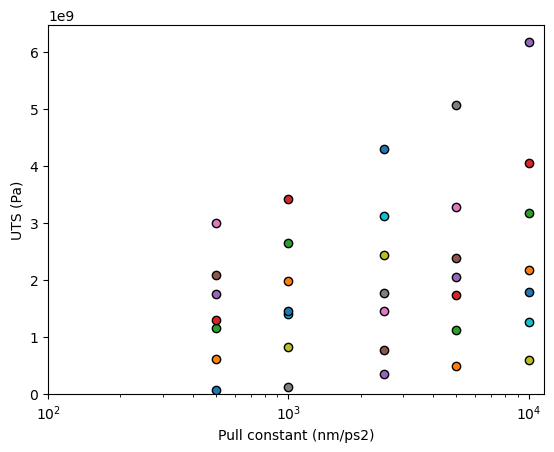

In [ ]:
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            plt.scatter(job.sp.pull_constant, np.array(job.doc['elastic_modulus']), edgecolors='k')
        except:
            print(f'Error in {job.sp.pdbID}')

plt.xlabel('Pull constant (nm/ps2)')
plt.ylabel('Elastic modulus (Pa)')
plt.ylim(0)
plt.xlim(100)
plt.xscale('log')
plt.show()

for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            plt.scatter(job.sp.pull_constant, np.array(job.doc['ultimate_tensile_strength']), edgecolors='k')
        except:
            print(f'Error in {job.sp.pdbID}')

plt.xlabel('Pull constant (nm/ps2)')
plt.ylabel('UTS (Pa)')
plt.xscale('log')
plt.xlim(100)
plt.ylim(0)

(450.0, 11000.0)

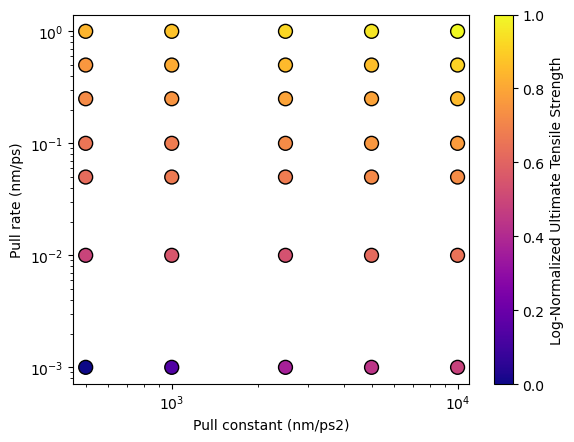

In [37]:
from matplotlib.colors import LogNorm
# from matplotlib.colors import Log 


uts, pc, pr = [], [], []
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            uts.append(job.doc['ultimate_tensile_strength'])
            pc.append(job.sp.pull_constant)
            pr.append(job.sp.pull_rate)

        except:
            print(f'Error in {job.sp.pdbID}')

norm = LogNorm(vmin=min(uts), vmax=max(uts))
plt.scatter(pc, pr, c=norm(uts), edgecolors='k', cmap='plasma', s = 100)
plt.xlabel('Pull constant (nm/ps2)')
plt.ylabel('Pull rate (nm/ps)')
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar()
# cbar = plt.colorbar(norm=norm, ticks=[1e-10, 1e-5, 1e0, 1e5, max_uts])
cbar.set_label('Log-Normalized Ultimate Tensile Strength')
plt.xlim(min(pc)-min(pc)*.1, max(pc)+max(pc)*.1)
# plt.ylim(0)

(450.0, 11000.0)

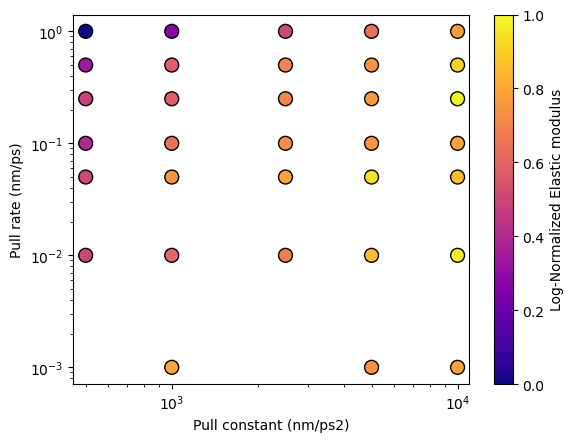

In [36]:
from matplotlib.colors import LogNorm


uts, pc, pr = [], [], []
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0 or job.doc.get('elastic_modulus') < 0:
                continue
            uts.append(job.doc['elastic_modulus'])
            pc.append(job.sp.pull_constant)
            pr.append(job.sp.pull_rate)

        except:
            print(f'Error in {job.sp.pdbID}')

norm = LogNorm(vmin=min(uts), vmax=max(uts))
plt.scatter(pc, pr, c=norm(uts), edgecolors='k', cmap='plasma', s=100)
plt.xlabel('Pull constant (nm/ps2)')
plt.ylabel('Pull rate (nm/ps)')
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar()
# cbar = plt.colorbar(norm=norm, ticks=[1e-10, 1e-5, 1e0, 1e5, max_uts])
cbar.set_label('Log-Normalized Elastic modulus')
plt.xlim(min(pc)-min(pc)*.1, max(pc)+max(pc)*.1)